# https://data.gov.uk/dataset/road-accidents-safety-data
Road Safety Data - Department for Transport - UK

In [1]:
# PySpark API:
#http://spark.apache.org/docs/latest/api/python/index.html

import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when

In [2]:
# The Spark Definition

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)

In [3]:
# Import libraries and other functions

from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
import gmplot
import pandas as pd

In [4]:
#Create a Dataframe directly from 'RoadSafetyData_Accident' Folder

roadAcci = spark.read.option("header","true").option("delimiter",",").option("inferSchema","true")\
.csv("hdfs:///user/imat5322_46432/RoadSafetyData_Accident")

In [5]:
#Print all the datatypes in 'roadAcci' dataframe

roadAcci

DataFrame[accident_index: string, accident_year: int, accident_reference: string, location_easting_osgr: string, location_northing_osgr: string, longitude: string, latitude: string, police_force: int, accident_severity: int, number_of_vehicles: int, number_of_casualties: int, date: string, day_of_week: int, time: string, local_authority_district: int, local_authority_ons_district: string, local_authority_highway: string, first_road_class: int, first_road_number: int, road_type: int, speed_limit: string, junction_detail: int, junction_control: int, second_road_class: int, second_road_number: int, pedestrian_crossing_human_control: int, pedestrian_crossing_physical_facilities: int, light_conditions: int, weather_conditions: int, road_surface_conditions: int, special_conditions_at_site: int, carriageway_hazards: int, urban_or_rural_area: int, did_police_officer_attend_scene_of_accident: int, trunk_road_flag: int, lsoa_of_accident_location: string]

In [6]:
#Display the schema of the dataframe'roadAcci'

roadAcci.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- police_force: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- number_of_vehicles: integer (nullable = true)
 |-- number_of_casualties: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- local_authority_district: integer (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- first_road_class: integer (nullable = true)
 |-- first_road_number: integer (nullable = true)
 |-- road_type: integer (nullable = true)
 |-- speed_limit: string (nullable = 

In [7]:
#Check the Total Number of records

roadAcci.count()

597973

# Data Cleansing

In [8]:
# Renaming Column names 

roadAcci = roadAcci.withColumnRenamed('pedestrian_crossing_human_control', 'crosswalk_human_control')
roadAcci = roadAcci.withColumnRenamed('pedestrian_crossing_physical_facilities', 'crosswalk_physical_facilities')

In [9]:
c = 0 # Reset counter
#Get the Total Number of Records
total = roadAcci.count()
print("******************************************")
print("Total Records in RoadSafetyData = " + str(total))

#Print the total Number of Columns
print("Total Columns in RoadSafetyData = " + str(len(roadAcci.columns)))
print("******************************************")

#Get the Missing Value number and Missing Rate of each column by looping entire table
while c < len(roadAcci.columns): #Loop through all columns
    print(str(c+1) + "." + str(roadAcci[c]))
    print("  Missing Values = ") 
    print("************************************************")
    mv = roadAcci.select([count(when(roadAcci[c].isNull(),\
                                        True))]).show() #Check for Missing values
    c = c+1 #Add 1 to counter variable

******************************************
Total Records in RoadSafetyData = 597973
Total Columns in RoadSafetyData = 36
******************************************
1.Column<b'accident_index'>
  Missing Values = 
************************************************
+-------------------------------------------------------+
|count(CASE WHEN (accident_index IS NULL) THEN true END)|
+-------------------------------------------------------+
|                                                      0|
+-------------------------------------------------------+

2.Column<b'accident_year'>
  Missing Values = 
************************************************
+------------------------------------------------------+
|count(CASE WHEN (accident_year IS NULL) THEN true END)|
+------------------------------------------------------+
|                                                     0|
+------------------------------------------------------+

3.Column<b'accident_reference'>
  Missing Values = 
**************

In [10]:
#Reset counter
c=0

print("******************************************")

#loop each column and get the Description of each one
while c < len(roadAcci.columns):
    mv =  roadAcci.where(roadAcci[c] =='').count() #get the Missing Value Number of current column
    print(str(c+1) + "." + str(roadAcci[c]))
    roadAcci.where(roadAcci[c] !='').describe(roadAcci.columns[c]).show()
    print("******************************************")
    c = c+1 #Counter adds 1

******************************************
1.Column<b'accident_index'>
+-------+--------------+
|summary|accident_index|
+-------+--------------+
|  count|        597973|
|   mean|      Infinity|
| stddev|           NaN|
|    min| 2016010000005|
|    max| 2020991032575|
+-------+--------------+

******************************************
2.Column<b'accident_year'>
+-------+-------------+
|summary|accident_year|
+-------+-------------+
|  count|            0|
|   mean|         null|
| stddev|         null|
|    min|         null|
|    max|         null|
+-------+-------------+

******************************************
3.Column<b'accident_reference'>
+-------+------------------+
|summary|accident_reference|
+-------+------------------+
|  count|            597973|
|   mean|          Infinity|
| stddev|               NaN|
|    min|         010000005|
|    max|         991032575|
+-------+------------------+

******************************************
4.Column<b'location_easting_osgr'>
+

In [11]:
# Removing unwanted Columns

roadAcci = roadAcci.drop('accident_index','accident_reference','location_easting_osgr','location_northing_osgr','local_authority_ons_district','first_road_class','first_road_number','second_road_class','second_road_number','trunk_road_flag','lsoa_of_accident_location')
roadAcci.show(5) #Displaying top 5 rows

+-------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+-----------------------+---------+-----------+---------------+----------------+-----------------------+-----------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|accident_year|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_highway|road_type|speed_limit|junction_detail|junction_control|crosswalk_human_control|crosswalk_physical_facilities|light_conditions|weather_conditions|road_surface_conditions|special_conditions_at_site|carriageway_hazards|urban_or_rural_area|did_police_officer_attend_scene_of_accident|
+-------------+---------+---------+------------+-----------------+----

In [12]:
# Retrieve only the Column names

roadAcci.columns

['accident_year',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_highway',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'crosswalk_human_control',
 'crosswalk_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident']

In [13]:
# Ensure the Total Count and the updated column count in the dataframe

print(roadAcci.count())

print(len(roadAcci.columns))

597973
25


# Analysis of Road Safety Accident Data

In [14]:
#Get the highest count of accident per year in descending order

roadAcci.groupby("accident_year").count().orderBy(desc("count")).show()

+-------------+------+
|accident_year| count|
+-------------+------+
|         2016|136621|
|         2017|129982|
|         2018|122635|
|         2019|117536|
|         2020| 91199|
+-------------+------+



In [15]:
# Get accidents happened by year with its severity in descending order

roadAcci.groupby("accident_year", "accident_severity").count().orderBy(desc("count")).show()

+-------------+-----------------+------+
|accident_year|accident_severity| count|
+-------------+-----------------+------+
|         2016|                3|113448|
|         2017|                3|105950|
|         2018|                3| 97996|
|         2019|                3| 92898|
|         2020|                3| 71453|
|         2019|                2| 22980|
|         2018|                2| 22968|
|         2017|                2| 22356|
|         2016|                2| 21478|
|         2020|                2| 18355|
|         2016|                1|  1695|
|         2017|                1|  1676|
|         2018|                1|  1671|
|         2019|                1|  1658|
|         2020|                1|  1391|
+-------------+-----------------+------+



In [16]:
#Get the accident rate based on accident each year with number of vehicles and casualities in descending order

roadAcci.groupby("accident_year", "number_of_vehicles", "number_of_casualties").count().orderBy(desc("count")).show()

+-------------+------------------+--------------------+-----+
|accident_year|number_of_vehicles|number_of_casualties|count|
+-------------+------------------+--------------------+-----+
|         2016|                 2|                   1|63661|
|         2017|                 2|                   1|59840|
|         2018|                 2|                   1|57714|
|         2019|                 2|                   1|56372|
|         2020|                 2|                   1|46277|
|         2016|                 1|                   1|35459|
|         2017|                 1|                   1|35080|
|         2018|                 1|                   1|32140|
|         2019|                 1|                   1|30664|
|         2020|                 1|                   1|23086|
|         2016|                 2|                   2|13694|
|         2017|                 2|                   2|12440|
|         2018|                 2|                   2|11630|
|       

In [17]:
#Get the accident count per year depends on number of casualities

roadAcci.groupby("accident_year", "number_of_casualties").count().orderBy(desc("count")).show()

+-------------+--------------------+------+
|accident_year|number_of_casualties| count|
+-------------+--------------------+------+
|         2016|                   1|106781|
|         2017|                   1|102480|
|         2018|                   1| 97143|
|         2019|                   1| 93591|
|         2020|                   1| 74161|
|         2016|                   2| 20563|
|         2017|                   2| 19012|
|         2018|                   2| 17694|
|         2019|                   2| 16694|
|         2020|                   2| 12221|
|         2016|                   3|  5955|
|         2017|                   3|  5460|
|         2018|                   3|  5035|
|         2019|                   3|  4604|
|         2020|                   3|  3214|
|         2016|                   4|  2084|
|         2017|                   4|  1934|
|         2018|                   4|  1738|
|         2019|                   4|  1684|
|         2020|                 

In [18]:
# Get the accident rate based on the light conditions with day of week and time

roadAcci.select("Light_Conditions", "day_of_week", "time").distinct().show()

+----------------+-----------+-----+
|Light_Conditions|day_of_week| time|
+----------------+-----------+-----+
|               1|          7|09:45|
|               4|          5|19:00|
|               1|          2|09:02|
|               1|          7|09:00|
|               4|          7|23:42|
|               1|          1|15:25|
|               4|          4|20:15|
|               4|          1|23:55|
|               4|          2|20:35|
|               5|          2|15:45|
|               7|          5|06:47|
|               4|          5|11:20|
|               4|          3|23:50|
|               1|          4|16:55|
|               1|          6|13:34|
|               1|          4|15:48|
|               1|          3|16:58|
|               1|          6|13:14|
|               1|          3|10:06|
|               4|          5|21:37|
+----------------+-----------+-----+
only showing top 20 rows



In [19]:
#Extract Month from the Dates of Accidents happened

Month = roadAcci.select(substring(roadAcci.date, 4,10).alias('date')).groupby("date").count().orderBy(desc("count")).show(30)
#check

+-------+-----+
|   date|count|
+-------+-----+
|11/2016|12741|
|11/2017|11958|
|07/2016|11777|
|01/2016|11688|
|10/2016|11624|
|09/2016|11571|
|05/2016|11482|
|08/2016|11461|
|07/2017|11450|
|10/2017|11194|
|11/2018|11168|
|01/2017|11147|
|12/2016|11146|
|06/2017|11130|
|09/2017|11091|
|05/2018|11050|
|06/2016|11046|
|06/2018|10995|
|07/2018|10985|
|11/2019|10937|
|05/2017|10922|
|10/2018|10897|
|03/2016|10836|
|03/2017|10806|
|02/2016|10657|
|04/2016|10592|
|09/2018|10495|
|12/2017|10470|
|07/2019|10325|
|10/2019|10311|
+-------+-----+
only showing top 30 rows



In [20]:
#Check how Police force was alert in each area when accident was occured

roadAcci.groupby("did_police_officer_attend_scene_of_accident","urban_or_rural_area","police_force").count().orderBy(desc("count")).show()

+-------------------------------------------+-------------------+------------+-----+
|did_police_officer_attend_scene_of_accident|urban_or_rural_area|police_force|count|
+-------------------------------------------+-------------------+------------+-----+
|                                          1|                  1|           1|85421|
|                                          3|                  1|           1|17878|
|                                          2|                  1|           1|15948|
|                                          1|                  1|          20|12741|
|                                          2|                  1|          20|12372|
|                                          1|                  1|          13|11753|
|                                          1|                  1|           6|10206|
|                                          1|                  1|           4| 9237|
|                                          1|                  1|

In [21]:
# accident rates according to the speed limit and time

roadAcci.groupby("speed_limit","time").count().orderBy(desc("count")).show()

+-----------+-----+-----+
|speed_limit| time|count|
+-----------+-----+-----+
|         30|17:00| 3671|
|         30|18:00| 3425|
|         30|17:30| 3397|
|         30|16:00| 3325|
|         30|15:30| 3320|
|         30|16:30| 3033|
|         30|15:00| 3029|
|         30|08:30| 2776|
|         30|18:30| 2773|
|         30|14:00| 2576|
|         30|13:00| 2551|
|         30|19:00| 2519|
|         30|12:00| 2260|
|         30|09:00| 2260|
|         30|13:30| 2251|
|         30|14:30| 2211|
|         30|12:30| 2184|
|         30|08:00| 2065|
|         30|17:15| 2007|
|         30|19:30| 1953|
+-----------+-----+-----+
only showing top 20 rows



In [22]:
# Get on which day of the week the more accident occured

roadAcci.groupby("day_of_week").count().orderBy(desc("count")).show()

+-----------+-----+
|day_of_week|count|
+-----------+-----+
|          6|97790|
|          5|91431|
|          4|89926|
|          3|88401|
|          2|84367|
|          7|79006|
|          1|67052|
+-----------+-----+



In [23]:
# Get accident rates based on day of the week and time in descending order

roadAcci.groupby("day_of_week","time").count().orderBy(desc("count")).show()

+-----------+-----+-----+
|day_of_week| time|count|
+-----------+-----+-----+
|          4|17:00|  964|
|          3|17:00|  941|
|          6|17:00|  933|
|          5|17:00|  902|
|          3|17:30|  881|
|          5|17:30|  878|
|          6|17:30|  877|
|          6|16:00|  877|
|          4|18:00|  873|
|          6|18:00|  867|
|          5|18:00|  865|
|          6|15:30|  865|
|          2|17:00|  861|
|          6|16:30|  851|
|          4|17:30|  842|
|          4|08:30|  836|
|          5|08:30|  817|
|          3|18:00|  809|
|          2|17:30|  808|
|          4|15:30|  798|
+-----------+-----+-----+
only showing top 20 rows



In [24]:
# Check for the area where accident occured more

roadAcci.groupby("urban_or_rural_area").count().orderBy(desc("count")).show()

+-------------------+------+
|urban_or_rural_area| count|
+-------------------+------+
|                  1|399771|
|                  2|198087|
|                  3|   114|
|                 -1|     1|
+-------------------+------+



In [25]:
# Based on road surface conditions and the area type get the accident rate

roadAcci.groupby("road_surface_conditions","urban_or_rural_area").count().orderBy(desc("count")).show()

+-----------------------+-------------------+------+
|road_surface_conditions|urban_or_rural_area| count|
+-----------------------+-------------------+------+
|                      1|                  1|295630|
|                      1|                  2|131693|
|                      2|                  1| 94032|
|                      2|                  2| 59432|
|                      4|                  2|  4626|
|                      9|                  1|  4508|
|                      4|                  1|  3067|
|                     -1|                  1|  1423|
|                      3|                  2|  1228|
|                      3|                  1|   956|
|                      5|                  2|   602|
|                     -1|                  2|   359|
|                      5|                  1|   155|
|                      9|                  2|   147|
|                      1|                  3|    76|
|                      2|                  3| 

In [26]:
# Get the rate of accidents based on the respective speed limits and crosswalks by humans

roadAcci.groupby("speed_limit", "crosswalk_human_control").count().orderBy(desc("count")).show()

+-----------+-----------------------+------+
|speed_limit|crosswalk_human_control| count|
+-----------+-----------------------+------+
|         30|                      0|345924|
|         60|                      0| 76187|
|         40|                      0| 49202|
|         20|                      0| 44921|
|         70|                      0| 37018|
|         50|                      0| 24261|
|         30|                      9|  7879|
|         30|                      2|  3895|
|         20|                      9|  3739|
|         30|                      1|  1434|
|         20|                      2|   852|
|         30|                     -1|   477|
|         40|                      9|   461|
|         20|                      1|   421|
|         40|                      2|   366|
|         50|                      9|   142|
|         40|                      1|    98|
|         60|                      2|    84|
|         70|                     -1|    69|
|         

In [27]:
# rate of accidents according to the road type and speed

roadAcci.groupby("speed_limit", "road_type").count().orderBy(desc("count")).show()

+-----------+---------+------+
|speed_limit|road_type| count|
+-----------+---------+------+
|         30|        6|288841|
|         60|        6| 67943|
|         20|        6| 37253|
|         70|        3| 32843|
|         40|        6| 28657|
|         30|        3| 28360|
|         30|        1| 23113|
|         40|        3| 14775|
|         50|        6| 13321|
|         30|        2| 10027|
|         50|        3|  8474|
|         30|        9|  6624|
|         40|        1|  5522|
|         20|        2|  4073|
|         60|        3|  3766|
|         20|        3|  3503|
|         60|        1|  3382|
|         30|        7|  2644|
|         20|        9|  2586|
|         70|        7|  2435|
+-----------+---------+------+
only showing top 20 rows



In [28]:
# Get the rate of accidents according to the light conditions and time

roadAcci.groupby("light_conditions","speed_limit").count().orderBy(desc("count")).show()

+----------------+-----------+------+
|light_conditions|speed_limit| count|
+----------------+-----------+------+
|               1|         30|257710|
|               4|         30| 87631|
|               1|         60| 56212|
|               1|         40| 35986|
|               1|         20| 35288|
|               1|         70| 25180|
|               1|         50| 17584|
|               6|         60| 15878|
|               4|         20| 12566|
|               4|         40| 10353|
|               7|         30|  7870|
|               6|         70|  5636|
|               4|         70|  5198|
|               6|         30|  3903|
|               4|         50|  3764|
|               4|         60|  3062|
|               6|         50|  2549|
|               6|         40|  2502|
|               5|         30|  2489|
|               7|         20|  1568|
+----------------+-----------+------+
only showing top 20 rows



In [29]:
# Check highest accident occured year based on light conditions and weatherconditions

roadAcci.groupby("accident_year", "light_conditions", "weather_conditions").count().orderBy(desc("count")).show()

+-------------+----------------+------------------+-----+
|accident_year|light_conditions|weather_conditions|count|
+-------------+----------------+------------------+-----+
|         2016|               1|                 1|84533|
|         2017|               1|                 1|77979|
|         2018|               1|                 1|75017|
|         2019|               1|                 1|69014|
|         2020|               1|                 1|52774|
|         2016|               4|                 1|20746|
|         2017|               4|                 1|19495|
|         2018|               4|                 1|17916|
|         2019|               4|                 1|17048|
|         2020|               4|                 1|13142|
|         2016|               1|                 2| 8643|
|         2019|               1|                 2| 8469|
|         2017|               1|                 2| 8056|
|         2018|               1|                 2| 6935|
|         2020

In [30]:
# Check the highest number of accidents occured in which loal authority highway with special_conditions_at_site &carriageway_hazards

roadAcci.groupby("local_authority_highway", "special_conditions_at_site", "carriageway_hazards").count().orderBy(desc("count")).show()

+-----------------------+--------------------------+-------------------+-----+
|local_authority_highway|special_conditions_at_site|carriageway_hazards|count|
+-----------------------+--------------------------+-------------------+-----+
|              E10000016|                         0|                  0|18076|
|              E10000030|                         0|                  0|14949|
|              E08000025|                         0|                  0|12343|
|              E10000012|                         0|                  0|12157|
|              E10000014|                         0|                  0|12129|
|              E10000017|                         0|                  0|11668|
|              E10000015|                         0|                  0| 9880|
|              E10000032|                         0|                  0| 8957|
|              E10000019|                         0|                  0| 8655|
|              E10000020|                         0|

In [31]:
# Check which local authority district has highest accident rate with junction_detail& junction_control

roadAcci.groupby("local_authority_district", "junction_detail", "junction_control").count().orderBy(desc("count")).show()

+------------------------+---------------+----------------+-----+
|local_authority_district|junction_detail|junction_control|count|
+------------------------+---------------+----------------+-----+
|                     300|              0|              -1| 4487|
|                     204|              0|              -1| 3511|
|                     596|              0|              -1| 3349|
|                     300|              3|               4| 3162|
|                     635|              0|              -1| 2297|
|                     200|              0|              -1| 2030|
|                     204|              3|               4| 1932|
|                       9|              3|               4| 1869|
|                     231|              0|              -1| 1842|
|                     215|              0|              -1| 1825|
|                     424|              0|              -1| 1795|
|                      10|              3|               4| 1775|
|         

In [32]:
# Check Accident rate based on time & crosswalk_physical_facilities

roadAcci.groupby("time", "crosswalk_physical_facilities").count().orderBy(desc("count")).show()

+-----+-----------------------------+-----+
| time|crosswalk_physical_facilities|count|
+-----+-----------------------------+-----+
|17:00|                            0| 4554|
|17:30|                            0| 4157|
|18:00|                            0| 4054|
|16:00|                            0| 3995|
|15:00|                            0| 3810|
|15:30|                            0| 3807|
|16:30|                            0| 3707|
|08:30|                            0| 3321|
|14:00|                            0| 3188|
|13:00|                            0| 3164|
|18:30|                            0| 3159|
|12:00|                            0| 2961|
|19:00|                            0| 2931|
|14:30|                            0| 2776|
|13:30|                            0| 2774|
|09:00|                            0| 2754|
|08:00|                            0| 2751|
|12:30|                            0| 2719|
|11:00|                            0| 2490|
|17:15|                         

In [33]:
#Using print() displaying the total number of records #check

print("The Road Safety Accidents dataframe has {} records in total!".format(roadAcci.count()))

The Road Safety Accidents dataframe has 597973 records in total!


# Creating dataframes

In [34]:
# Create new Dataframe and Filter rows containing accident_severity = 1

AcciSevr = roadAcci.filter(roadAcci["accident_severity"]=="1")
AcciSevr.count()

8091

In [35]:
#Display dataframe 'AcciSevr'

AcciSevr.show(3)

+-------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+-----------------------+---------+-----------+---------------+----------------+-----------------------+-----------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|accident_year|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_highway|road_type|speed_limit|junction_detail|junction_control|crosswalk_human_control|crosswalk_physical_facilities|light_conditions|weather_conditions|road_surface_conditions|special_conditions_at_site|carriageway_hazards|urban_or_rural_area|did_police_officer_attend_scene_of_accident|
+-------------+---------+---------+------------+-----------------+----

In [36]:
# Create new Dataframe where light_conditions = 1

AcciLight = roadAcci.filter(roadAcci["light_conditions"]=="1")
AcciLight.count()

428051

In [37]:
#Display dataframe 'AccLight'
AcciLight.show(3)

+-------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+-----------------------+---------+-----------+---------------+----------------+-----------------------+-----------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|accident_year|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_highway|road_type|speed_limit|junction_detail|junction_control|crosswalk_human_control|crosswalk_physical_facilities|light_conditions|weather_conditions|road_surface_conditions|special_conditions_at_site|carriageway_hazards|urban_or_rural_area|did_police_officer_attend_scene_of_accident|
+-------------+---------+---------+------------+-----------------+----

# SQL Library

In [38]:
#Register 'roadAccident' DataFrame as a temporary table named 'tbl_roadAccid'

roadAcci.registerTempTable("tbl_roadAccid")

In [39]:
# SQL is run over DataFrames that have been registered as a table

sqlContext.sql("select * from tbl_roadAccid").show()

+-------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+-----------------------+---------+-----------+---------------+----------------+-----------------------+-----------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|accident_year|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_highway|road_type|speed_limit|junction_detail|junction_control|crosswalk_human_control|crosswalk_physical_facilities|light_conditions|weather_conditions|road_surface_conditions|special_conditions_at_site|carriageway_hazards|urban_or_rural_area|did_police_officer_attend_scene_of_accident|
+-------------+---------+---------+------------+-----------------+----

In [40]:
#Retreive accident severity in descending order

sqlContext.sql("select * from tbl_roadAccid order by accident_severity desc").show()

+-------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+-----------------------+---------+-----------+---------------+----------------+-----------------------+-----------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|accident_year|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_highway|road_type|speed_limit|junction_detail|junction_control|crosswalk_human_control|crosswalk_physical_facilities|light_conditions|weather_conditions|road_surface_conditions|special_conditions_at_site|carriageway_hazards|urban_or_rural_area|did_police_officer_attend_scene_of_accident|
+-------------+---------+---------+------------+-----------------+----

In [41]:
# Get the count of accidents happened with time in descending order

sqlContext.sql("select * from tbl_roadAccid order by time desc").show()

+-------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+-----------------------+---------+-----------+---------------+----------------+-----------------------+-----------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|accident_year|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_highway|road_type|speed_limit|junction_detail|junction_control|crosswalk_human_control|crosswalk_physical_facilities|light_conditions|weather_conditions|road_surface_conditions|special_conditions_at_site|carriageway_hazards|urban_or_rural_area|did_police_officer_attend_scene_of_accident|
+-------------+---------+---------+------------+-----------------+----

In [42]:
# Create a dataframe that provides accident rate based on time, date, policeforce and year

roadAccident = sqlContext.sql("select time, date, police_force, accident_year, substring(accident_year, 0, 4) as year, count(*) \
as count from tbl_roadAccid group by time, date, police_force, accident_year")

In [43]:
#Display the dataframe

roadAccident.show()

+-----+----------+------------+-------------+----+-----+
| time|      date|police_force|accident_year|year|count|
+-----+----------+------------+-------------+----+-----+
|14:41|01/11/2016|           1|         2016|2016|    1|
|07:00|02/11/2016|           1|         2016|2016|    1|
|10:55|02/11/2016|           1|         2016|2016|    1|
|14:50|04/11/2016|           1|         2016|2016|    1|
|07:21|08/11/2016|           1|         2016|2016|    1|
|17:30|13/11/2016|           1|         2016|2016|    1|
|07:50|20/11/2016|           1|         2016|2016|    1|
|00:20|28/11/2016|           1|         2016|2016|    1|
|08:35|28/11/2016|           1|         2016|2016|    1|
|07:15|29/11/2016|           1|         2016|2016|    2|
|08:35|30/11/2016|           1|         2016|2016|    1|
|15:30|01/12/2016|           1|         2016|2016|    1|
|13:50|02/11/2016|           1|         2016|2016|    1|
|09:58|03/12/2016|           1|         2016|2016|    1|
|20:00|19/11/2016|           1|

In [44]:
# Get the Casualties per day of week

sqlContext.sql("select Day_of_Week, Number_of_Casualties, count(*) as Count from tbl_roadAccid group \
by Day_of_Week, Number_of_Casualties").show()

+-----------+--------------------+-----+
|Day_of_Week|Number_of_Casualties|Count|
+-----------+--------------------+-----+
|          5|                  33|    1|
|          4|                  10|    5|
|          6|                   1|77971|
|          3|                   1|71477|
|          7|                   4| 1532|
|          2|                   2|12076|
|          3|                  13|    1|
|          2|                  19|    1|
|          7|                  14|    1|
|          1|                   7|   68|
|          7|                   1|60351|
|          2|                   3| 3290|
|          4|                   7|   44|
|          1|                   2|10668|
|          4|                  27|    1|
|          1|                   9|   11|
|          5|                   7|   43|
|          5|                   6|  105|
|          4|                  11|    3|
|          6|                   8|   21|
+-----------+--------------------+-----+
only showing top

In [45]:
# Get the highest count of the severity of accident

sqlContext.sql("select accident_severity,COUNT(*) from tbl_roadAccid group by accident_severity order by accident_severity")\
.show()

+-----------------+--------+
|accident_severity|count(1)|
+-----------------+--------+
|                1|    8091|
|                2|  108137|
|                3|  481745|
+-----------------+--------+



In [46]:
# Create a dataframe that provides severity of accident per month

month_acci = sqlContext.sql("select accident_severity, substring(Date, 4, 2) as month, count(*)\
as Count from tbl_roadAccid group by month, accident_severity")

In [47]:
month_acci.show()

+-----------------+-----+-----+
|accident_severity|month|Count|
+-----------------+-----+-----+
|                2|   07|10045|
|                1|   05|  634|
|                1|   07|  705|
|                1|   08|  727|
|                2|   12| 8727|
|                3|   03|37928|
|                3|   01|42547|
|                2|   03| 8041|
|                2|   06| 9336|
|                2|   02| 7904|
|                1|   06|  607|
|                3|   12|40259|
|                1|   01|  704|
|                1|   11|  709|
|                3|   08|39526|
|                1|   02|  619|
|                3|   04|33439|
|                3|   11|44149|
|                1|   03|  581|
|                2|   09| 9911|
+-----------------+-----+-----+
only showing top 20 rows



In [48]:
#Create a dataframe which shows number of casualties per month

month_casual = sqlContext.sql("select number_of_casualties, substring(Date, 4, 2) as month, count(*)\
                              as Count from tbl_roadAccid group by month, number_of_casualties")

In [49]:
month_casual.show()

+--------------------+-----+-----+
|number_of_casualties|month|Count|
+--------------------+-----+-----+
|                   4|   08|  873|
|                   7|   03|   23|
|                  16|   06|    1|
|                  26|   11|    1|
|                  10|   07|    7|
|                  13|   07|    1|
|                   7|   09|   31|
|                   9|   03|    6|
|                  27|   10|    1|
|                  20|   06|    1|
|                   6|   09|   88|
|                  11|   04|    1|
|                   8|   01|    8|
|                  23|   11|    1|
|                   6|   08|  136|
|                   8|   02|    9|
|                  52|   10|    1|
|                   9|   02|    6|
|                   2|   07| 7750|
|                  12|   09|    2|
+--------------------+-----+-----+
only showing top 20 rows



In [50]:
# Generate the data that gives the highest accident rate with road type

sqlContext.sql("SELECT road_type, COUNT(*) FROM tbl_roadAccid GROUP BY road_type ORDER BY road_type").show()

+---------+--------+
|road_type|count(1)|
+---------+--------+
|       -1|       1|
|        1|   37315|
|        2|   14499|
|        3|   91726|
|        6|  436070|
|        7|    7870|
|        9|   10492|
+---------+--------+



# Creating Temptable for data visualisation - Number of casualities per month

In [51]:
Month = month_casual.select(month_casual.month) \
.groupby(month_casual.month).count()

In [52]:
Month.printSchema()

root
 |-- month: string (nullable = true)
 |-- count: long (nullable = false)



In [53]:
Month.show()

+-----+-----+
|month|count|
+-----+-----+
|   07|   19|
|   11|   16|
|   01|   15|
|   09|   16|
|   05|   12|
|   08|   16|
|   03|   16|
|   02|   13|
|   06|   17|
|   10|   18|
|   12|   14|
|   04|   14|
+-----+-----+



In [54]:
Month.registerTempTable("tbl_month")

In [55]:
# Create a new dataframe having month, total, and average

AcciMonth = sqlContext.sql("select substring(Month, 1, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_month group by substring(Month, 1, 2)")

In [56]:
AcciMonth.show()

+-----+-----+-------+
|Month|Total|Average|
+-----+-----+-------+
|   07|   19|   19.0|
|   11|   16|   16.0|
|   01|   15|   15.0|
|   09|   16|   16.0|
|   05|   12|   12.0|
|   08|   16|   16.0|
|   03|   16|   16.0|
|   02|   13|   13.0|
|   06|   17|   17.0|
|   10|   18|   18.0|
|   12|   14|   14.0|
|   04|   14|   14.0|
+-----+-----+-------+



In [57]:
# Register the monthly amount of accidents  
# DataFrame as a temp table and show the contents

AcciMonth.registerTempTable("Monthly_rate")
sqlContext.sql("select * from Monthly_rate").show()

+-----+-----+-------+
|Month|Total|Average|
+-----+-----+-------+
|   07|   19|   19.0|
|   11|   16|   16.0|
|   01|   15|   15.0|
|   09|   16|   16.0|
|   05|   12|   12.0|
|   08|   16|   16.0|
|   03|   16|   16.0|
|   02|   13|   13.0|
|   06|   17|   17.0|
|   10|   18|   18.0|
|   12|   14|   14.0|
|   04|   14|   14.0|
+-----+-----+-------+



# Create Temptable for data visualisation - Accidents per year

In [58]:
# Create new data frame with Month and Counts per Month

year = roadAcci.select(roadAcci.accident_year) \
.groupby(roadAcci.accident_year).count()

In [59]:
year.printSchema()

root
 |-- accident_year: integer (nullable = true)
 |-- count: long (nullable = false)



In [60]:
year.show()

+-------------+------+
|accident_year| count|
+-------------+------+
|         2018|122635|
|         2019|117536|
|         2020| 91199|
|         2016|136621|
|         2017|129982|
+-------------+------+



In [61]:
year.registerTempTable("tbl_year")

In [62]:
# Create dataframe to get information by year (total and average)

AcciYear = sqlContext.sql("select substring(accident_year, 1, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_year group by substring(accident_year, 1, 4)")

In [63]:
AcciYear.show()

+----+------+--------+
|Year| Total| Average|
+----+------+--------+
|2016|136621|136621.0|
|2020| 91199| 91199.0|
|2019|117536|117536.0|
|2017|129982|129982.0|
|2018|122635|122635.0|
+----+------+--------+



In [64]:
# Register the monthly amount of accidents  
# DataFrame as a temp table and show the contents

AcciYear.registerTempTable("Yearly_rate")
sqlContext.sql("select * from Yearly_rate").show()

+----+------+--------+
|Year| Total| Average|
+----+------+--------+
|2016|136621|136621.0|
|2020| 91199| 91199.0|
|2019|117536|117536.0|
|2017|129982|129982.0|
|2018|122635|122635.0|
+----+------+--------+



# Plot Visualisations

In [65]:
# Prepare variables for Monthly Accident visualisations

monthArray = sqlContext.sql("select month from Monthly_rate")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from Monthly_rate")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from Monthly_rate")\
.rdd.map(lambda f:f[0]).collect()

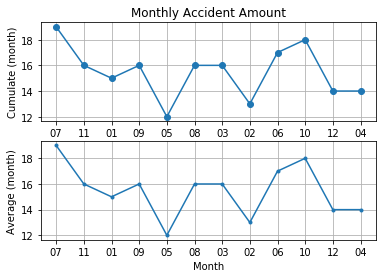

In [66]:
# Plot Visualisations 

import matplotlib.pyplot as plt
import numpy as np

y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Monthly Accident Amount')
plt.ylabel('Cumulate (month)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Month')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("monthly_accident_amount.png") #check
plt.show()

In [67]:
# Prepare variables for year wise visualisations

totalArray = sqlContext.sql("select Total from Yearly_rate")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from Yearly_rate")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from Yearly_rate")\
.rdd.map(lambda f:f[0]).collect()

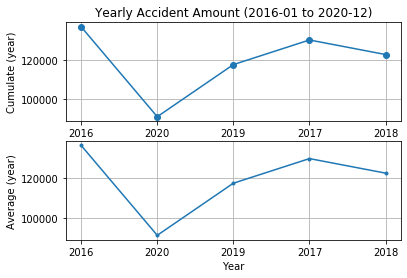

In [68]:
# Plot Visualisations

import matplotlib.pyplot as plt
import numpy as np

y = yearArray
t = totalArray
a = averageArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Yearly Accident Amount (2016-01 to 2020-12)')
plt.ylabel('Cumulate (year)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (year)')
plt.grid(True)
plt.savefig("yearly_accident_amount.png")
plt.show()

In [69]:
#Create temptable for accident rates

roadAcci.registerTempTable("tbl_accirate")

In [70]:
# type of accidents in month
Acci_rate=sqlContext.sql("select accident_severity, accident_year, \
count(*) as Count from tbl_accirate group by accident_year, accident_severity")

In [71]:
Acci_rate.show()

+-----------------+-------------+------+
|accident_severity|accident_year| Count|
+-----------------+-------------+------+
|                3|         2017|105950|
|                3|         2019| 92898|
|                3|         2020| 71453|
|                1|         2018|  1671|
|                3|         2018| 97996|
|                2|         2016| 21478|
|                1|         2019|  1658|
|                2|         2019| 22980|
|                1|         2016|  1695|
|                1|         2020|  1391|
|                2|         2020| 18355|
|                2|         2017| 22356|
|                2|         2018| 22968|
|                1|         2017|  1676|
|                3|         2016|113448|
+-----------------+-------------+------+



# Data Visualisations

In [72]:
# import the library for visualisation

import pixiedust

Pixiedust database opened successfully



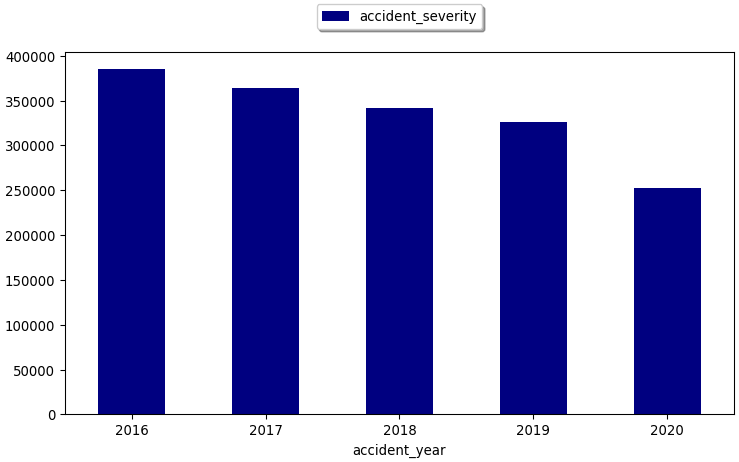

In [73]:
# Display of Accident severity per year

display(roadAcci)


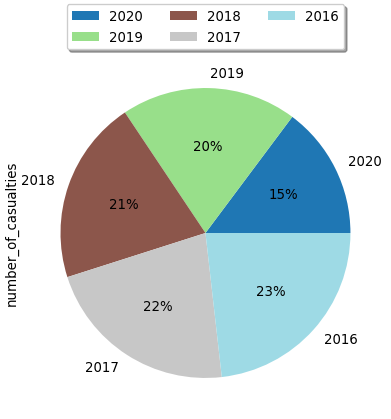

In [74]:
# Display of accident Casuality count per year

display(roadAcci)

In [ ]:
# Display of Accident rate in whole UK using geographical map

display(roadAcci)

In [76]:
# Display of Accident Severity for each day of week

display(roadAcci)

In [ ]:
# Display of Active Police force during accidents in each year

display(roadAccident)


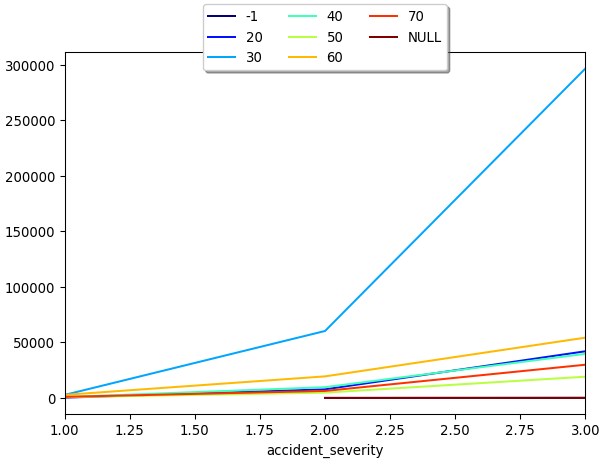

In [78]:
# Display of Accident severity with Speed limit

display(roadAcci)

In [79]:
# Display of Casuality count for each weather conditions

display(roadAcci)


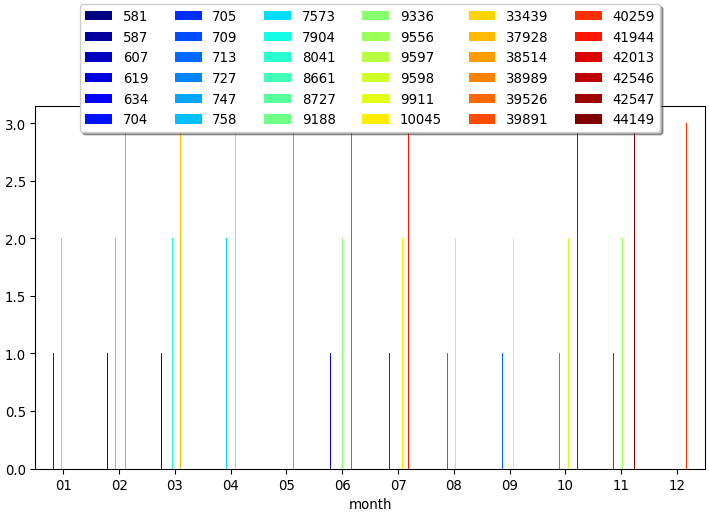

In [80]:
# Display of Casuality count for each weather conditions with the help of SQL library

display(month_acci)

In [81]:
# Display of Casuality count per month using dataframe created through SQL library

display(month_casual)


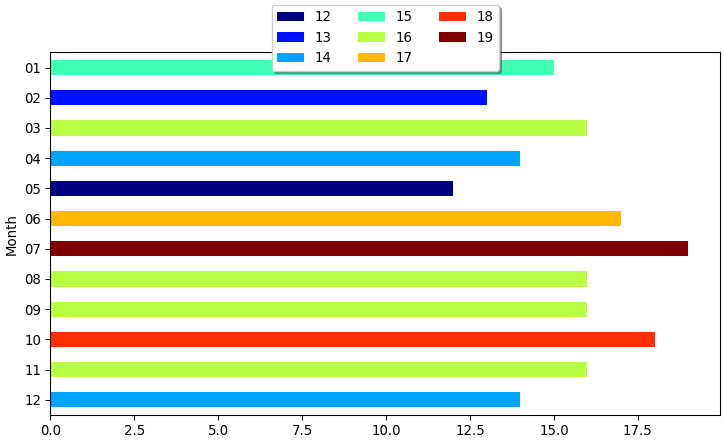

In [ ]:
#Display of Average accidents per month using dataframe created through SQL library

display(AcciMonth)

In [83]:
#Display of Average accidents per month using dataframe created through SQL library

display(AcciYear)

Year,Average
2016,136621.0
2020,91199.0
2019,117536.0
2017,129982.0
2018,122635.0
